> # **CAPSTONE PROJECT MODULE 2**

**SECTION**:
<BR> [1. DATA UNDERSTANDING](#1-data-understanding)
<BR> [2. DATABASE](#2-database)
<BR> [3. EXPLORATORY DATA ANALYSIS (EDA)](#3-exploratory-data-analysis)
<BR> [4. DATA VISUALIZATION](#4-data-visualization)
<BR> [5. STATISTICS](#5-statistics)


# **1. DATA UNDERSTANDING**

## CONTEXT

**Northwind** is a fictious company which engage in importing and exporting specialty foods from all over the world. The database contains detail information of the transactions such as customers, orders data, products, employee who managed the order, etc. Fort this study, objective is to extract insights from the data that could facilitate the company growth. This project objective is focused on the employees performance.



## DATABASE INFORMATION

Source: [Northwind](https://drive.google.com/drive/folders/1fTHrwh_gcLsOFKXHnUzUGEu_APxLoD9i)
<br><br>
This Database contains 13<sup>*</sup> Tables as the following:

1.  **Categories** : contains product categories
3.	**Customers** : contains customer detailed information
4.	**Employees** : contains employee detailed information
5.	**EmployeeTerritories** : contains information of employee in charge of teritories
6.	**OrderDetails** : contains costumer's order summary
7.	**Orders** : contains order detailed information from customer
8.	**Products** : contains product detailed information
9.	**Region** : contais information of shipping area
10.	**Shippers** : contains information of the shipping company
11.	**Suppliers** : contains detailed information of product's suppliers
12.	**Territories** : contains region classifications

<sup>*</sup> the other 2 tables **CustomerCustomerDemo** & **CustomerDemographics** are blank tables 
<br><br><br>

The image below displays the **Entity Relationship Diagram (ERD)** of Northwind Traders. <br> <br>

![ERD](https://raw.githubusercontent.com/jpwhite3/northwind-SQLite3/master/Northwind_ERD.png)

# **2. DATABASE**

## Connect to Database

This section demonstrate the preliminary process of the data analysis. The first step is by **creating a connection** the ``Northwind`` database to access all the tables within the database.

### Importing Modules

In [73]:
import mysql.connector as SQLconnect
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Connection to Database


In [74]:
mydb = SQLconnect.connect(
    host = 'localhost',
    user = 'root',
    passwd = '00000000',
    database = 'Northwind' # Nama Database
)

After the connection to database is created, the next thing to do is generate a function to write a ``query`` for accessing the tables in which then will be stored in the form of DataFrame. Then, the result from the query can be stored and used for analysis purposes. This query will also involving relationship between tables.

### Query Function

In [75]:
mycursor = mydb.cursor()

def db_df(yourQuery):
    mycursor.execute(yourQuery)
    myresult = mycursor.fetchall()
    df = pd.DataFrame(myresult, columns = mycursor.column_names)
    return df


# Show tables

db_df(
    '''
    show tables
    '''
)

,Tables_in_northwind
0,Categories
1,CustomerCustomerDemo
2,CustomerDemographics
3,Customers
4,Employees
5,EmployeeTerritories
6,OrderDetails
7,Orders
8,Products
9,Region


# **3. EXPLORATORY DATA ANALYSIS**

Background research is conducted at this step to develop business insight and formulating hypothesis test questions. Since this study is focus on the employess, it will be started by extracting relevant information from the `Employee` Table.

In [76]:
emp = db_df(
    '''
    select EmployeeID, LastName, FirstName, Title
    from Employees
    '''
)

emp

,EmployeeID,LastName,FirstName,Title
0,1,Davolio,Nancy,Sales Representative
1,2,Fuller,Andrew,"Vice President, Sales"
2,3,Leverling,Janet,Sales Representative
3,4,Peacock,Margaret,Sales Representative
4,5,Buchanan,Steven,Sales Manager
5,6,Suyama,Michael,Sales Representative
6,7,King,Robert,Sales Representative
7,8,Callahan,Laura,Inside Sales Coordinator
8,9,Dodsworth,Anne,Sales Representative


In [163]:
pd.DataFrame(emp['Title'].unique())

,0
0,Sales Representative
1,"Vice President, Sales"
2,Sales Manager
3,Inside Sales Coordinator


## Data Aggregation

To perform more EDA, data from several tables are joined such as, `Employees, EmployeeTerritories, Territories, Region, Orders, OrderDetails, Products, Categories`. Only the information that is deemed to be crucial is taken from each table. The following data was gathered:
- EmployeeID from Employees table
- LastName from Employees table
- FirstName from Employees table
- Title from Employees table
- TerritoryID from EmployeeTerritories table
- TerritoryDescription from Territories table
- RegionID from Region table
- RegionDescription from Region table
- OrderID from Orders table
- CustomerID from Orders table
- ShipCountry from Orders table
- OrderDate from Orders table
- ShippedDate from Orders table
- RequiredDate from Orders table
- ProductID from OrderDetails table
- Quantity from OrderDetails table
- UnitPrice from Products table
- ProductName from Products table
- CategoryID from Products table
- CategoryName from Categories table
<br><br>
Despite from tables, a column was also generated to add more data for analysis. **Discount column was created from the different between UnitPrice from Products and OrderDetails tables divided by UnitPrice from products table**. All of these information will be stored into DataFrame for further processing.

In [77]:
emp_sales = db_df(
    ''' 
    select e.EmployeeID, e.LastName, e.FirstName, e.Title, 
    et.TerritoryID,
    t.TerritoryDescription,
    r.RegionID, r.RegionDescription,
    o.OrderID, o.CustomerID, o.ShipCountry, o.OrderDate, o.ShippedDate, o.RequiredDate,
    od.ProductID, p.UnitPrice, od.Quantity,
    p.ProductName, p.CategoryID,
    c.CategoryName,
    round(((p.UnitPrice - od.UnitPrice)/p.UnitPrice),2) Discount

    from Employees e
    left join EmployeeTerritories et on e.EmployeeID = et.EmployeeID
    left join Territories t on et.TerritoryID = t.TerritoryID
    left join Region r on t.RegionID = r.RegionID
    left join Orders o on e.EmployeeID = o.EmployeeID
    left join OrderDetails od on o.OrderID = od.OrderID
    left join Products p on od.ProductID = p.ProductID
    left join Categories c on p.CategoryID = c.CategoryID
    '''
)

emp_sales.head()

,EmployeeID,LastName,FirstName,Title,TerritoryID,TerritoryDescription,RegionID,RegionDescription,OrderID,CustomerID,...,OrderDate,ShippedDate,RequiredDate,ProductID,UnitPrice,Quantity,ProductName,CategoryID,CategoryName,Discount
0,1,Davolio,Nancy,Sales Representative,06897,Wilton ...,1,Eastern ...,10258,ERNSH,...,1996-07-17,1996-07-23,1996-08-14,2,19.0000,50,Chang,1,Beverages,0.20
1,1,Davolio,Nancy,Sales Representative,06897,Wilton ...,1,Eastern ...,10258,ERNSH,...,1996-07-17,1996-07-23,1996-08-14,5,21.3500,65,Chef Anton's Gumbo Mix,2,Condiments,0.20
2,1,Davolio,Nancy,Sales Representative,06897,Wilton ...,1,Eastern ...,10258,ERNSH,...,1996-07-17,1996-07-23,1996-08-14,32,32.0000,6,Mascarpone Fabioli,4,Dairy Products,0.20
3,1,Davolio,Nancy,Sales Representative,06897,Wilton ...,1,Eastern ...,10270,WARTH,...,1996-08-01,1996-08-02,1996-08-29,36,19.0000,30,Inlagd Sill,8,Seafood,0.20
4,1,Davolio,Nancy,Sales Representative,06897,Wilton ...,1,Eastern ...,10270,WARTH,...,1996-08-01,1996-08-02,1996-08-29,43,46.0000,25,Ipoh Coffee,1,Beverages,0.20


## Finding & Handling Anomalies

In [80]:
# Cheking Table info
emp_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   EmployeeID            10129 non-null  int64         
 1   LastName              10129 non-null  object        
 2   FirstName             10129 non-null  object        
 3   Title                 10129 non-null  object        
 4   TerritoryID           10129 non-null  object        
 5   TerritoryDescription  10129 non-null  object        
 6   RegionID              10129 non-null  int64         
 7   RegionDescription     10129 non-null  object        
 8   OrderID               10129 non-null  int64         
 9   CustomerID            10129 non-null  object        
 10  ShipCountry           10129 non-null  object        
 11  OrderDate             10129 non-null  datetime64[ns]
 12  ShippedDate           9840 non-null   datetime64[ns]
 13  RequiredDate    

Based on the table summary above, it can be seen the non-null count and data type of each column. `ShippedDate` is a feature that has unequal number of non-null count compared to others features. **Therefore, it indicates the missing values in which will be resolved in the next step**.
<br><br>
Besides, there is also an inappropriate data type in accordance to the feature. `UnitPrice` & `Discount` features are supposed to be a numerical data type (int/float), however, the table summary reads them as an object. **Therefore, they will be converted later on**.

### Missing Values

In [81]:
# Checking Missing Values
emp_sales.isnull().sum()

EmployeeID                0
LastName                  0
FirstName                 0
Title                     0
TerritoryID               0
TerritoryDescription      0
RegionID                  0
RegionDescription         0
OrderID                   0
CustomerID                0
ShipCountry               0
OrderDate                 0
ShippedDate             289
RequiredDate              0
ProductID                 0
UnitPrice                 0
Quantity                  0
ProductName               0
CategoryID                0
CategoryName              0
Discount                  0
dtype: int64

In [82]:
# Removing Value
emp_sales.dropna(inplace = True)

In [83]:
# Re-checking Table info
emp_sales.isnull().sum()

EmployeeID              0
LastName                0
FirstName               0
Title                   0
TerritoryID             0
TerritoryDescription    0
RegionID                0
RegionDescription       0
OrderID                 0
CustomerID              0
ShipCountry             0
OrderDate               0
ShippedDate             0
RequiredDate            0
ProductID               0
UnitPrice               0
Quantity                0
ProductName             0
CategoryID              0
CategoryName            0
Discount                0
dtype: int64

There are 73 data from `ShippedDate` in which have missing values. The proportion of missing values to total data is only about 3%, therefore, it can be assumed not significant.

### Converting Data Format

In [84]:
# Checking Table info
emp_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9840 entries, 0 to 10125
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   EmployeeID            9840 non-null   int64         
 1   LastName              9840 non-null   object        
 2   FirstName             9840 non-null   object        
 3   Title                 9840 non-null   object        
 4   TerritoryID           9840 non-null   object        
 5   TerritoryDescription  9840 non-null   object        
 6   RegionID              9840 non-null   int64         
 7   RegionDescription     9840 non-null   object        
 8   OrderID               9840 non-null   int64         
 9   CustomerID            9840 non-null   object        
 10  ShipCountry           9840 non-null   object        
 11  OrderDate             9840 non-null   datetime64[ns]
 12  ShippedDate           9840 non-null   datetime64[ns]
 13  RequiredDate     

In [85]:
# Converting specific data format
emp_sales['UnitPrice'] = pd.to_numeric(emp_sales['UnitPrice'])
emp_sales['Discount'] = pd.to_numeric(emp_sales['Discount'])

# Re-checking Table info
emp_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9840 entries, 0 to 10125
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   EmployeeID            9840 non-null   int64         
 1   LastName              9840 non-null   object        
 2   FirstName             9840 non-null   object        
 3   Title                 9840 non-null   object        
 4   TerritoryID           9840 non-null   object        
 5   TerritoryDescription  9840 non-null   object        
 6   RegionID              9840 non-null   int64         
 7   RegionDescription     9840 non-null   object        
 8   OrderID               9840 non-null   int64         
 9   CustomerID            9840 non-null   object        
 10  ShipCountry           9840 non-null   object        
 11  OrderDate             9840 non-null   datetime64[ns]
 12  ShippedDate           9840 non-null   datetime64[ns]
 13  RequiredDate     

The `UnitPrice` which intitally read as object has been converted into numerical (float).

### Duplicate Data

In [86]:
emp_sales[emp_sales.duplicated()]

,EmployeeID,LastName,FirstName,Title,TerritoryID,TerritoryDescription,RegionID,RegionDescription,OrderID,CustomerID,...,OrderDate,ShippedDate,RequiredDate,ProductID,UnitPrice,Quantity,ProductName,CategoryID,CategoryName,Discount


There is no duplicate data observed from the table. Therefore, no further action required.

### Feature 'Revenue', 'Process Duration', and 'Shipping Duration'

In [87]:
# Adding New Column
emp_sales['Revenue'] = (emp_sales['UnitPrice'] * emp_sales['Quantity'])*(1-emp_sales['Discount'])
emp_sales['ProcessDuration'] = emp_sales['ShippedDate'] - emp_sales['OrderDate']
emp_sales['ShippingDuration'] = emp_sales['RequiredDate'] - emp_sales['ShippedDate']
emp_sales.sample(5)

,EmployeeID,LastName,FirstName,Title,TerritoryID,TerritoryDescription,RegionID,RegionDescription,OrderID,CustomerID,...,ProductID,UnitPrice,Quantity,ProductName,CategoryID,CategoryName,Discount,Revenue,ProcessDuration,ShippingDuration
1223,2,Fuller,Andrew,"Vice President, Sales",01833,Georgetow ...,1,Eastern ...,10462,CONSH,...,23,9.00,21,Tunnbrd,5,Grains/Cereals,0.20,151.20,15 days,13 days
6837,7,King,Robert,Sales Representative,60601,Chicago ...,2,Westerns ...,10597,PICCO,...,65,21.05,12,Louisiana Fiery Hot Pepper Sauce,2,Condiments,0.00,252.60,7 days,21 days
470,1,Davolio,Nancy,Sales Representative,19713,Neward ...,1,Eastern ...,10579,LETSS,...,15,15.50,10,Genen Shouyu,2,Condiments,0.00,155.00,9 days,19 days
3483,3,Leverling,Janet,Sales Representative,33607,Tampa ...,4,Southern ...,10625,ANATR,...,60,34.00,10,Camembert Pierrot,4,Dairy Products,0.00,340.00,6 days,22 days
2436,3,Leverling,Janet,Sales Representative,30346,Atlanta ...,4,Southern ...,10432,SPLIR,...,54,7.45,40,Tourtire,6,Meat/Poultry,0.21,235.42,7 days,7 days


### Unique Values

After the new columns is created. It is suggested to preview the output of that features for avoiding any data anomalies. Extracting unique value can be utilized in addressing this problem.  

In [88]:
emp_sales[['Revenue']].value_counts().sort_index(ascending=True)

Revenue  
4.800         7
7.268         3
9.600         4
10.000        2
12.500        7
             ..
8432.000      7
9903.200      4
10329.200    10
10540.000    20
15810.000     9
Length: 847, dtype: int64

In [183]:
emp_sales[['ProcessDuration']].value_counts().sort_index(ascending=True).head()

ProcessDuration
1 days             226
2 days             736
3 days             986
4 days             752
5 days             809
dtype: int64

In [90]:
emp_sales[['ShippingDuration']].value_counts().sort_index(ascending=True).head()

ShippingDuration
-23 days            10
-18 days            16
-17 days             7
-16 days            35
-11 days             4
dtype: int64

#### Anomaly on ``ShippingDuration``

From the two features ``ShippingDuration`` & ``ProcessDuration``, only the ``ShippingDuration`` that has an indication of anomaly. It has 92 data with negative values. There are two possibility regarding this condition such as, that they are a missed-type data during the input. And the second possibility is that they all are delayed.
<br><br>
For the first possibility, those missing values can be dropped. For the second possibility, those data can be retained for further analysis. This study is assuming that they are delayed in delivery.

In [91]:
emp_sales[emp_sales['ShippingDuration'] < '0'].head()

,EmployeeID,LastName,FirstName,Title,TerritoryID,TerritoryDescription,RegionID,RegionDescription,OrderID,CustomerID,...,ProductID,UnitPrice,Quantity,ProductName,CategoryID,CategoryName,Discount,Revenue,ProcessDuration,ShippingDuration
181,1,Davolio,Nancy,Sales Representative,06897,Wilton ...,1,Eastern ...,10709,GOURL,...,8,40.0,40,Northwoods Cranberry Sauce,2,Condiments,0.0,1600.0,34 days,-6 days
182,1,Davolio,Nancy,Sales Representative,06897,Wilton ...,1,Eastern ...,10709,GOURL,...,51,53.0,28,Manjimup Dried Apples,7,Produce,0.0,1484.0,34 days,-6 days
183,1,Davolio,Nancy,Sales Representative,06897,Wilton ...,1,Eastern ...,10709,GOURL,...,60,34.0,10,Camembert Pierrot,4,Dairy Products,0.0,340.0,34 days,-6 days
232,1,Davolio,Nancy,Sales Representative,06897,Wilton ...,1,Eastern ...,10827,BONAP,...,10,31.0,15,Ikura,8,Seafood,0.0,465.0,25 days,-11 days
233,1,Davolio,Nancy,Sales Representative,06897,Wilton ...,1,Eastern ...,10827,BONAP,...,39,18.0,21,Chartreuse verte,1,Beverages,0.0,378.0,25 days,-11 days


## Preview Cleaned Data

After all anomalies are addressed, it can be assumed that this data are clean and ready for further analysis.

In [92]:
# Clean Data
emp_sales.sample(8)

,EmployeeID,LastName,FirstName,Title,TerritoryID,TerritoryDescription,RegionID,RegionDescription,OrderID,CustomerID,...,ProductID,UnitPrice,Quantity,ProductName,CategoryID,CategoryName,Discount,Revenue,ProcessDuration,ShippingDuration
9236,8,Callahan,Laura,Inside Sales Coordinator,53404,Racine ...,3,Northern ...,10596,WHITC,...,75,7.75,30,Rhnbru Klosterbier,1,Beverages,0.0,232.500,32 days,-4 days
3751,4,Peacock,Margaret,Sales Representative,20852,Rockville ...,1,Eastern ...,10382,ERNSH,...,29,123.79,14,Thringer Rostbratwurst,6,Meat/Poultry,0.2,1386.448,3 days,25 days
5242,5,Buchanan,Steven,Sales Manager,08837,Edison ...,1,Eastern ...,10841,SUPRD,...,10,31.00,16,Ikura,8,Seafood,0.0,496.000,9 days,19 days
7081,7,King,Robert,Sales Representative,80202,Denver ...,2,Westerns ...,10958,OCEAN,...,5,21.35,20,Chef Anton's Gumbo Mix,2,Condiments,0.0,427.000,9 days,19 days
7156,7,King,Robert,Sales Representative,80909,Colorado Springs ...,2,Westerns ...,10507,ANTON,...,43,46.00,15,Ipoh Coffee,1,Beverages,0.0,690.000,7 days,21 days
852,2,Fuller,Andrew,"Vice President, Sales",01581,Westboro ...,1,Eastern ...,10912,HUNGO,...,11,21.00,40,Queso Cabrales,4,Dairy Products,0.0,840.000,20 days,8 days
3980,4,Peacock,Margaret,Sales Representative,20852,Rockville ...,1,Eastern ...,10830,TRADH,...,60,34.00,30,Camembert Pierrot,4,Dairy Products,0.0,1020.000,8 days,34 days
5895,6,Suyama,Michael,Sales Representative,85014,Phoenix ...,2,Westerns ...,10999,OTTIK,...,51,53.00,15,Manjimup Dried Apples,7,Produce,0.0,795.000,7 days,21 days


### Cleaned Data General Info

In [93]:
# Check Info
listitem = []
for col in emp_sales.columns:
    listitem.append([col, emp_sales[col].dtype, len(emp_sales), 
    emp_sales[col].isna().sum(),round((emp_sales[col].isna().sum()/len(emp_sales[col]))* 100,2), 
    emp_sales[col].nunique()])

emp_sales_desc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value',
                            'Missing Value %', 'Number of Unique'], data=listitem)

emp_sales_desc

,Column Name,Data Type,Data Count,Missing Value,Missing Value %,Number of Unique
0,EmployeeID,int64,9840,0,0.0,9
1,LastName,object,9840,0,0.0,9
2,FirstName,object,9840,0,0.0,9
3,Title,object,9840,0,0.0,4
4,TerritoryID,object,9840,0,0.0,49
5,TerritoryDescription,object,9840,0,0.0,48
6,RegionID,int64,9840,0,0.0,4
7,RegionDescription,object,9840,0,0.0,4
8,OrderID,int64,9840,0,0.0,809
9,CustomerID,object,9840,0,0.0,89


In [94]:
emp_sales.to_csv('Northwind_Cleaned_Data.csv')

### Outlier Check

In [171]:
# Outlier Check With Function

Q1_amount = emp_sales['ProcessDuration'].describe()['25%']
Q3_amount = emp_sales['ProcessDuration'].describe()['75%']
IQR = Q3_amount - Q1_amount

outlier_index = emp_sales[(emp_sales['ProcessDuration'] < Q1_amount - (1.5 * IQR)) | (emp_sales['ProcessDuration'] > Q3_amount + (1.5 * IQR)) ].index
not_outlier_index = emp_sales[(emp_sales['ProcessDuration'] > Q1_amount - (1.5 * IQR)) & (emp_sales['ProcessDuration']< Q3_amount + (1.5 * IQR)) ].index
emp_sales.loc[outlier_index]

,EmployeeID,LastName,FirstName,Title,TerritoryID,TerritoryDescription,RegionID,RegionDescription,OrderID,CustomerID,...,ProductID,UnitPrice,Quantity,ProductName,CategoryID,CategoryName,Discount,Revenue,ProcessDuration,ShippingDuration
47,1,Davolio,Nancy,Sales Representative,06897,Wilton ...,1,Eastern ...,10371,LAMAI,...,36,19.00,6,Inlagd Sill,8,Seafood,0.2,91,21 days,7 days
93,1,Davolio,Nancy,Sales Representative,06897,Wilton ...,1,Eastern ...,10482,LAZYK,...,40,18.40,10,Boston Crab Meat,8,Seafood,0.2,147,20 days,8 days
97,1,Davolio,Nancy,Sales Representative,06897,Wilton ...,1,Eastern ...,10508,OTTIK,...,13,6.00,10,Konbu,8,Seafood,0.0,60,27 days,1 days
98,1,Davolio,Nancy,Sales Representative,06897,Wilton ...,1,Eastern ...,10508,OTTIK,...,39,18.00,10,Chartreuse verte,1,Beverages,0.0,180,27 days,1 days
103,1,Davolio,Nancy,Sales Representative,06897,Wilton ...,1,Eastern ...,10525,BONAP,...,36,19.00,30,Inlagd Sill,8,Seafood,0.0,570,21 days,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,9,Dodsworth,Anne,Sales Representative,55439,Minneapolis ...,3,Northern ...,10978,MAISD,...,21,10.00,40,Sir Rodney's Scones,3,Confections,0.0,400,28 days,0 days
10117,9,Dodsworth,Anne,Sales Representative,55439,Minneapolis ...,3,Northern ...,10978,MAISD,...,40,18.40,10,Boston Crab Meat,8,Seafood,0.0,184,28 days,0 days
10118,9,Dodsworth,Anne,Sales Representative,55439,Minneapolis ...,3,Northern ...,10978,MAISD,...,44,19.45,6,Gula Malacca,2,Condiments,0.0,116,28 days,0 days
10124,9,Dodsworth,Anne,Sales Representative,55439,Minneapolis ...,3,Northern ...,11022,HANAR,...,19,9.20,35,Teatime Chocolate Biscuits,3,Confections,0.0,322,20 days,8 days


In [ ]:
emp_sales[]

In [181]:
%%html
<div class='tableauPlaceholder' id='viz1649063971725' style='position: relative'><noscript><a href='#'><img alt='Sheet 10 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ou&#47;Outlier_16490639381000&#47;Sheet10&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Outlier_16490639381000&#47;Sheet10' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ou&#47;Outlier_16490639381000&#47;Sheet10&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1649063971725');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [184]:
emp_sales[['ProcessDuration']].value_counts().sort_index(ascending=True)

ProcessDuration
1 days              226
2 days              736
3 days              986
4 days              752
5 days              809
6 days             1093
7 days             1329
8 days              760
9 days              846
10 days             640
11 days             155
12 days             205
13 days              46
14 days              77
15 days              57
16 days               2
17 days              40
18 days              77
19 days             133
20 days              62
21 days              77
22 days              61
23 days             105
24 days              50
25 days              53
26 days              20
27 days              12
28 days              38
29 days             102
30 days              69
31 days              13
32 days              81
34 days              49
35 days              65
37 days              14
dtype: int64

# **4. DATA VISUALIZATION**


In [103]:
%%html
<div class='tableauPlaceholder' id='viz1648989521060' style='position: relative'><noscript><a href='#'><img alt='Employees Dashboard ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CapstoneProjectModule2_16489894915820&#47;EmployeesDashboard&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='CapstoneProjectModule2_16489894915820&#47;EmployeesDashboard' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CapstoneProjectModule2_16489894915820&#47;EmployeesDashboard&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1648989521060');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1169px';vizElement.style.height='854px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1169px';vizElement.style.height='854px';} else { vizElement.style.width='100%';vizElement.style.height='1227px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

After clean data is  obtained then it can be used for further analysis. Base on the dashboard above, it can be summarize as follows:

- The top left chart displays the overview of employees performance based on cumulative orders. Margaret has the highest orders with total 365 orders from all categories. The top 3 categories that she managed to sell are Beverages, Seafood, and Confections with total orders 63, 60, and 60 respectively.<br><br>
- The bottom left chart illustrates the total Nett revenue for each employee. Even though Margaret has the highest cumulative orders, however, she did not generate the highest Nett Revenue. On the contrary, Robert who is not even on the top performance based on orders, was able to generate the highest Nett Revenue almost doubled Margaret's Nett Revenue with aproximately over $1.3 Millions. As a Sales Representative, Robert has successfuly exceeded Andew's performance who is a Vice President with total Nett Revenue around $1.2 Millions. Robert's top revenue comes from Beverages and Dairy Products categories.
<br><br>
- The bottom right chart descibes the total discount proceed by an employee. It can be seen that Robert is the most discount giver with total amount of nearly $103,000. He provided the most discounts in the Beverages category with apporimately $60.000.
<br><br>
- The top right table displays the summary of employees performance on every job title. It shows that Robert and Andrew are the top performers who sell the product with the most quantity. They have sold 44,490 and 40,866 items in total for Robert and Andrew respectively.


In [110]:
%%HTML
<div class='tableauPlaceholder' id='viz1649013645533' style='position: relative'><noscript><a href='#'><img alt='Revenue Dashboard ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CapstoneProjectModule2-1&#47;RevenueDashboard&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='CapstoneProjectModule2-1&#47;RevenueDashboard' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CapstoneProjectModule2-1&#47;RevenueDashboard&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1649013645533');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1169px';vizElement.style.height='854px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1169px';vizElement.style.height='854px';} else { vizElement.style.width='100%';vizElement.style.height='1427px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

As the first dashboard is more focus on the revenue distribution on products categories for employees, the second dashboard will be more focused on the revenue distribution on regions. It can be summarize as follows:
- The top left chart illustrates the employees distribution per region. Eastern region has the most man power sources which is managed by 4 employees with 3 different job levels (Vice President, Sales Manager, Sales Representative). Meanwhile Southern region has the least manpower with 1 employees as Sales Representative. <br><br>
- Top right chart describes on the revenue distribution per region. Eastern region generates the highest revenue compared to the other 3 and nearly doubled the Western region revenue. Eastern region managed by by Andrew, Margaret, Nancy, Steven and Andrew generate almost 50% of the Region's revenue. Similar situation also applied on Westrern region where as it managed by Michael and Robert. Robert generates almost 80% of the Region's revenue. <br><br>
- Bottom right chart displays the total gross revenue on monthly basis since July 1996 - May 1998. May 1998 has the lowest gross revenue of all. There is no sales record of Northern and Southen region at that time. It's either an input error or due to there is no actual sales from that regions. On the other hand, the highest Gross Revenue generated on April 1998. Western and Eastern regions contribute almost 75% of the revenue on that month.<br><br>
- Bottom left chart shows the comparison of Gross Revenue and Discounted Categories. Beverages category made the most Nett Revenue and also got the most discounts compared to others, a little over 30% discounts. Seafood category got the least discount percentage which is under 20%. Grain and Produce categories are both contribute to the lowest Gross Revenue which are under $500k.

# **5. STATISTICS**

After seeing some of the charts, company need to analyze the employees' performance in order to compensate them accordingly. The hypotheses that can be used are as follows:
<br>
<br>**Ho**: There is no difference between the 9 employees in terms of Revenue contribution.
<br>**Ha**: There is a difference between the 9 employees in terms of Revenue contribution.
<br>**Alpha**: 0.05

Base on the chart, it seems to lend evidence to **REJECT** the Null Hypothesis. It will be verified by the statistical evidence.

In [115]:
# Normality Test
from scipy.stats import normaltest

stat, pval = normaltest(emp_sales['Revenue'])
a = 0.05

if pval < a:
    print(f'P-value: {pval} < {a} - REJECT H0')
    print('DATA ARE NOT NORMAL DISTRIBUTION')
else:
    print(f'P-value: {pval} > {a} - FAIL TO REJECT H0')
    print('DATA ARE NORMAL DISTRIBUTION')


P-value: 0.0 < 0.05 - REJECT H0
DATA ARE NOT NORMAL DISTRIBUTION


In [134]:
# Hypothesis Testing (Kruskal Wallis)
# emp_sales['Revenue'] = pd.to_numeric(emp_sales['Revenue'].astype(int))

from scipy.stats import kruskal

krus, pval_krus = kruskal(
    emp_sales[emp_sales['FirstName'] == 'Nancy']['Revenue'],
    emp_sales[emp_sales['FirstName'] == 'Andrew']['Revenue'],
    emp_sales[emp_sales['FirstName'] == 'Janet']['Revenue'],
    emp_sales[emp_sales['FirstName'] == 'Margaret']['Revenue'],
    emp_sales[emp_sales['FirstName'] == 'Steven']['Revenue'],
    emp_sales[emp_sales['FirstName'] == 'Michael']['Revenue'],
    emp_sales[emp_sales['FirstName'] == 'Robert']['Revenue'],
    emp_sales[emp_sales['FirstName'] == 'Laura']['Revenue'],
    emp_sales[emp_sales['FirstName'] == 'Anne']['Revenue']
)

if pval_krus < 0.05 :
    print (f'P-Value {pval_krus} < 5%; REJECT H0 ')
    print ('There is at least one employee has difference performance in terms of Revenue contribution')
else :
    print (f'P-Value {pval_krus} > 5%; FAIL TO REJECT H0')
    print ('There is no difference performance between the 9 employees in terms of Revenue contribution')

P-Value 2.3311880071171352e-05 < 5%; REJECT H0 
There is at least one employee has difference performance in terms of Revenue contribution


<AxesSubplot:>

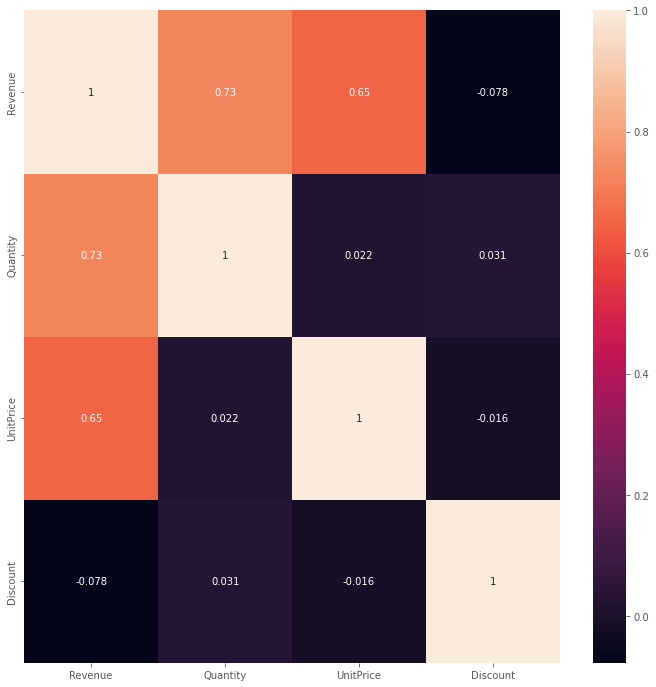

In [153]:
# Correlation

plt.figure(figsize=(12,12))
sns.heatmap(emp_sales[['Revenue','Quantity','UnitPrice','Discount']].corr('spearman'), annot=True)

Correlation testing between Discount variable Quantity is 0.031. It can be seen that Quantity and Discount have weak positive relationship.